Document Classification

1. Text pre-processing and exploration:

In [25]:
import os
import nltk
import sklearn
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from os import listdir
from os.path import isfile, join    
import sklearn.datasets as sk
import matplotlib.pyplot as plt



In [64]:
# here you should put the directory path
path='d:\\documents\\users\\nogahm\\Downloads\\ohsumed-first-20000-docs'

dirpath=path
trainDirs=[]
testDirs=[]
trainFiles=[]
testFiles=[]
# for table
Category=[]
FileName=[]
Path=[]
Text=[]
classNumOfDocs=[]
trainInfo=[] #[fileName,cleanText,class
testInfo=[]

stopWords=(stopwords.words('english'))
stopWords += {',','.',':',';','(',')','{','}','[',']','patients','+/-','may'}#set(String.punctuation)

In [65]:
# get train and test dirs
trainDirs=os.listdir(dirpath+'\\training')
testDirs=os.listdir(dirpath+'\\test')

In [66]:
# pre-process
def cleanText(text):
    # tokenize
    tokenized = word_tokenize(text)
    # remove stop words
    filtered_sentence = [w for w in tokenized if not w in stopWords]
    filtered_sentence = [w for w in filtered_sentence if len(w)>1]
    # stemming
    ps = PorterStemmer()
    index=0
    for i in range(len(filtered_sentence)-1):
        if len(text) > 1:
            try:
                filtered_sentence[index] = ps.stem(filtered_sentence[i])
            except Exception as inst:
                filtered_sentence[index]=filtered_sentence[i]
    return " ".join(filtered_sentence)


In [67]:
# get train and test dirs
for dir in trainDirs:
    for file in os.listdir(dirpath+'\\training\\'+dir):
        trainFiles.append(file)
        Category.append(dir)
        FileName.append(file)
        Path.append(dirpath+'\\training\\'+dir+'\\'+file)
        # Open a file: fileReader
        fileReader = open(dirpath+'\\training\\'+dir+'\\'+file,mode='r')
        # read all lines at once
        text = fileReader.read().lower()
        # close the file
        fileReader.close()

        cleanedText=cleanText(text)
        trainInfo.append([file,cleanedText,dir,'training'])

for dir in testDirs:
    for file in os.listdir(dirpath+'\\test\\'+dir):
        testFiles.append(file)
        Category.append(dir)
        FileName.append(file)
        Path.append(dirpath+'\\test\\'+dir+'\\'+file)
        # Open a file: fileReader
        fileReader = open(dirpath+'\\test\\'+dir+'\\'+file,mode='r')
        # read all lines at once
        text = fileReader.read().lower()
        # close the file
        fileReader.close()

        cleanedText = cleanText(text)
        testInfo.append([file, cleanedText, dir, 'test'])

# of categories:  23


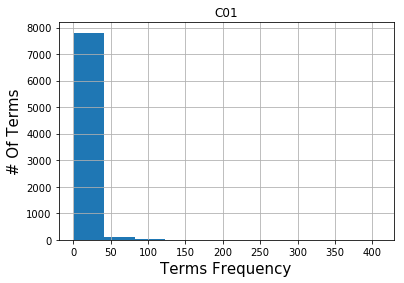

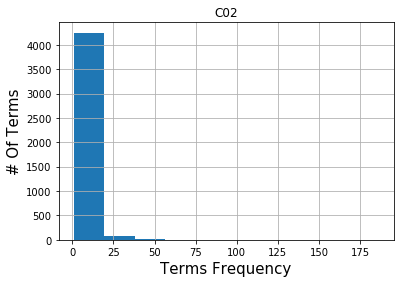

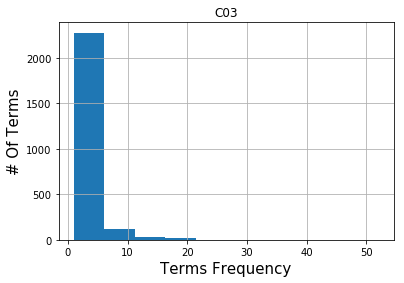

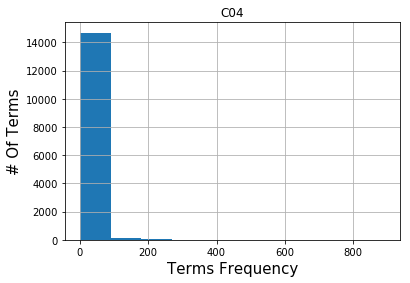

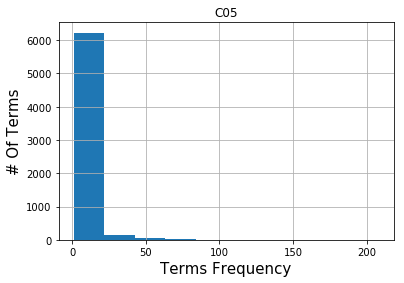

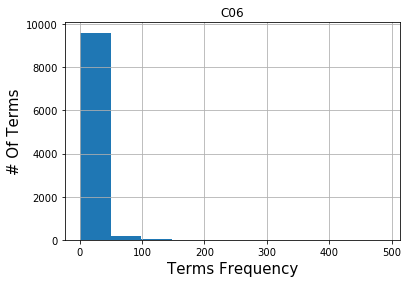

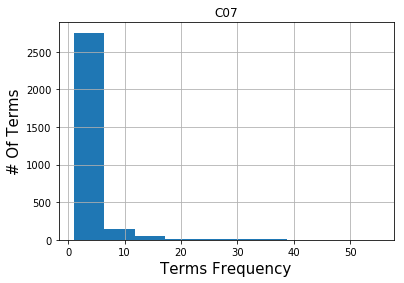

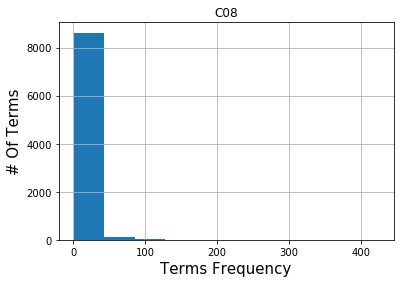

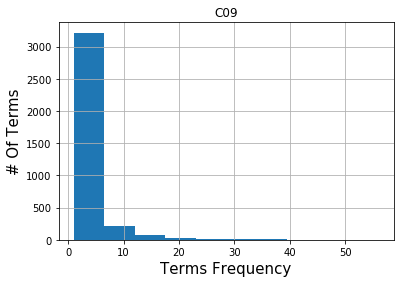

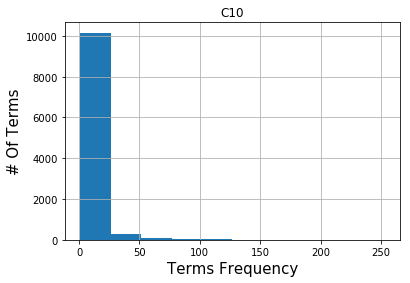

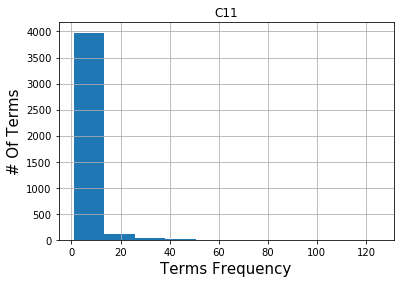

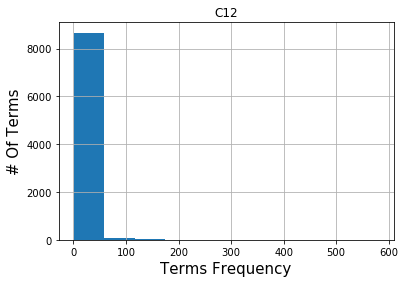

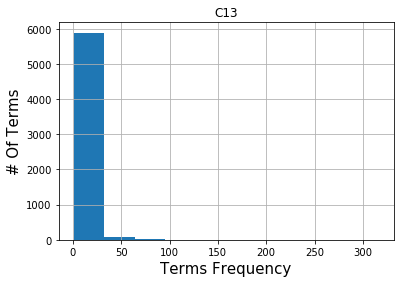

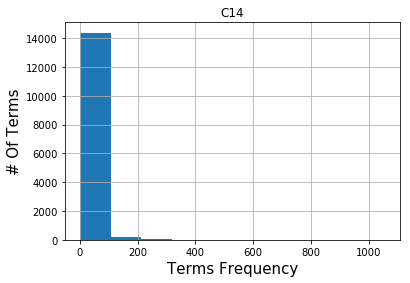

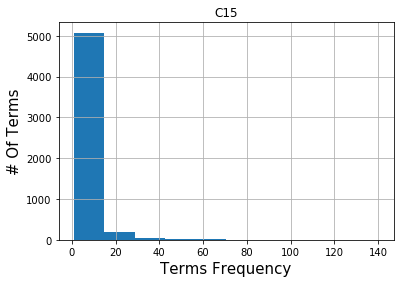

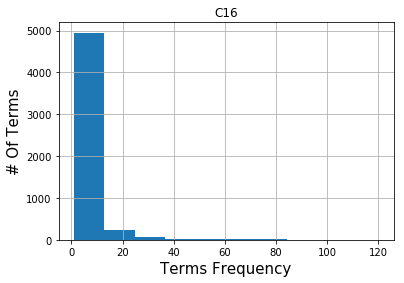

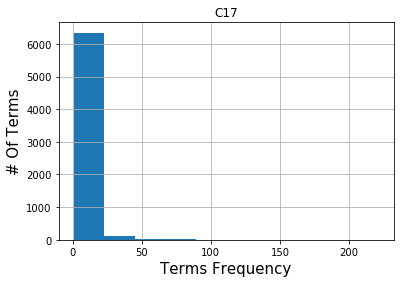

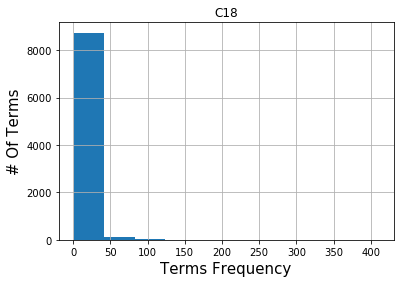

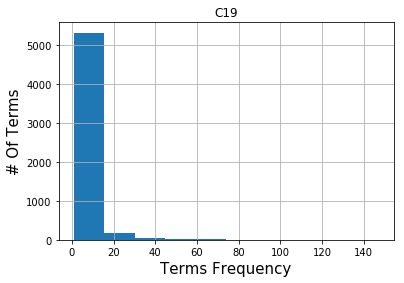

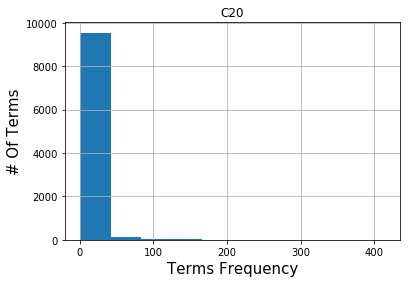

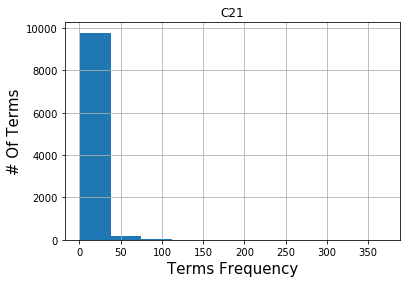

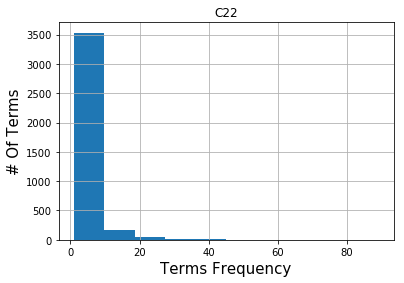

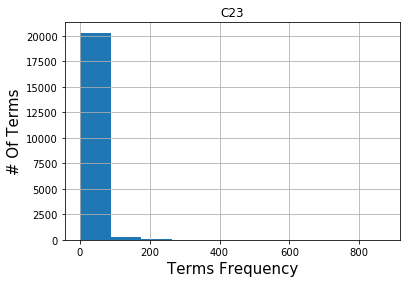

   Class  #OfFiles
0    C01       423
1    C02       158
2    C03        65
3    C04      1163
4    C05       283
5    C06       588
6    C07       100
7    C08       473
8    C09       125
9    C10       621
10   C11       162
11   C12       491
12   C13       281
13   C14      1249
14   C15       215
15   C16       200
16   C17       295
17   C18       388
18   C19       191
19   C20       525
20   C21       546
21   C22        92
22   C23      1799


,Class,term 1,term 2,term 3,term 4,term 5,term 6,term 7,term 8,term 9,term 10
0,C01,"(infection, 408)","(treatment, 258)","(disease, 196)","(group, 194)","(therapy, 171)","(less, 160)","(clinical, 156)","(cases, 154)","(infections, 150)","(children, 143)"
1,C02,"(infection, 186)","(virus, 180)","(human, 132)","(immunodeficiency, 101)","(hiv, 90)","(disease, 82)","(cells, 70)","(clinical, 65)","(aids, 60)","(two, 57)"
2,C03,"(infection, 52)","(disease, 43)","(treatment, 33)","(cases, 28)","(falciparum, 27)","(malaria, 26)","(levels, 23)","(therapy, 22)","(treated, 21)","(patient, 21)"
3,C04,"(tumor, 892)","(cancer, 888)","(cells, 862)","(cell, 769)","(carcinoma, 705)","(tumors, 573)","(treatment, 555)","(disease, 503)","(cases, 491)","(one, 439)"
4,C05,"(bone, 208)","(treatment, 107)","(years, 105)","(results, 102)","(syndrome, 94)","(arthritis, 93)","(disease, 93)","(study, 92)","(one, 90)","(less, 85)"
5,C06,"(disease, 489)","(less, 313)","(treatment, 272)","(gastric, 264)","(two, 233)","(study, 226)","(one, 223)","(liver, 221)","(group, 219)","(patient, 208)"
6,C07,"(treatment, 55)","(periodontal, 44)","(disease, 37)","(gland, 36)","(primary, 36)","(dental, 35)","(parotid, 34)","(cells, 34)","(patient, 34)","(oral, 33)"
7,C08,"(lung, 424)","(pulmonary, 399)","(less, 268)","(disease, 250)","(respiratory, 232)","(group, 219)","(treatment, 212)","(patient, 174)","(study, 166)","(therapy, 148)"
8,C09,"(disease, 56)","(treatment, 55)","(ear, 55)","(nasal, 54)","(study, 50)","(cases, 46)","(hearing, 46)","(group, 46)","(one, 42)","(carcinoma, 41)"
9,C10,"(group, 253)","(pain, 248)","(less, 244)","(patient, 235)","(disease, 230)","(study, 209)","(clinical, 202)","(treatment, 194)","(cerebral, 190)","(results, 187)"


In [68]:
#get number of classes and number of docs for each class
docInfoDF=pd.DataFrame(trainInfo, columns=['fileName','cleanText','class','group'])
allClasses=np.unique(docInfoDF['class'])
print ('# of categories: ',allClasses.size)
numOfFiles=[]
words_per_class = []
termsFreqPerClass=[]
for currClass in allClasses:
    temp=(docInfoDF['class']).value_counts()[currClass]
    numOfFiles.append([currClass, temp])
    #get terms distibution
    currFiles=docInfoDF.loc[docInfoDF['class']==currClass]
    # get terms freq in currClass
    termsFreq=pd.Series(" ".join(currFiles['cleanText']).split()).value_counts()
    termsFreqDF = pd.DataFrame()
    termsFreqDF['term'] = termsFreq.index
    termsFreqDF['freq'] = list(termsFreq)
    #histograma
    fig = termsFreqDF.hist(column="freq")
    plt.title(currClass)
    plt.xlabel("Terms Frequency", fontsize=15)
    plt.ylabel("# Of Terms", fontsize=15)
    plt.show(fig)

    #get top 10
    termsFreq=termsFreq[:10]
    # termsFreqPerClass.append([currClass,zip(termsFreq.index,termsFreq)])
    zipedFreq=zip(termsFreq.index, termsFreq)
    zippedList=list(zipedFreq)
    termsFreqPerClass.append([currClass]+zippedList)

# print number of files prt category
numOfFilesDF=pd.DataFrame(numOfFiles,columns=['Class','#OfFiles'])
print(numOfFilesDF)
# print terms frequency
pd.DataFrame(termsFreqPerClass, columns=['Class','term 1','term 2','term 3','term 4','term 5','term 6','term 7','term 8','term 9','term 10'])

#### Challenges:
* There are words which common at most of the categories (such as.... ),that can effect the accurcy of the model.
* Finding the right parameters and understand their meaning in order to impprove the algorithem
* 

<h1> 2. Document classification: <h1>

feature extraction methods: TF-IDF, Bag Of Words
machine learning models: SVM, Naïve Bayes

In [78]:
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron

In [79]:
# save best
best_accuracy = 0.0
best_fe = ''
best_classifier = ''
best_corpus_type = ''

In [80]:
train=docInfoDF.loc[docInfoDF['group']=='training']
trainSetText=train['cleanText'].tolist()
trainSetClass=train['class'].tolist()
test=pd.DataFrame(testInfo, columns=['fileName','cleanText','class','group'])
testSetText=train['cleanText'].tolist()
testSetClass=train['class'].tolist()

In [81]:
def classify(extractM,machineLearningM, parameters): 
            pipeline = Pipeline([('vect', extractM), ('clf', machineLearningM)])
            gs_clf = GridSearchCV(pipeline, parameters, n_jobs=1)
            gs_clf = gs_clf.fit(trainSetText, trainSetClass)
            prediction = gs_clf.predict(testSetText)
            accuracy = metrics.accuracy_score(testSetClass, prediction)
            print(accuracy)
            return accuracy

In [82]:
results=[]
parameters = {'vect__max_df': (0.3,0.5),'clf__alpha': (0.01, 0.1)}
#TF-IDF & SVM
print('TF-IDF AND SVM')
accuracy = classify(TfidfVectorizer(),SGDClassifier() ,parameters)
results.append(['TF-IDF' , 'SVM', '(0.3,0.5)','(0.01, 0.1)',accuracy])


TF-IDF AND SVM


0.579028083964


In [83]:
#TF-IDF & Naïve Bayes
print('TF-IDF AND Naïve Bayes')
accuracy = classify(TfidfVectorizer(),MultinomialNB() ,parameters)
results.append(['TF-IDF' , 'Naïve Bayes','(0.3,0.5)','(0.01, 0.1)', accuracy])

TF-IDF AND Naïve Bayes


0.593022141282


In [84]:
#Bag of Words & SVM
print('Bag of Words AND SVM')
accuracy = classify(CountVectorizer(),SGDClassifier() ,parameters)
results.append(['Bag of Words' , 'SVM', '(0.3,0.5)','(0.01, 0.1)', accuracy])

Bag of Words AND SVM


0.508866097958


In [85]:
#Bag of Words & Naïve Bayes
print('Bag of Words AND Naïve Bayes')
accuracy = classify(CountVectorizer(),MultinomialNB() ,parameters)
results.append(['Bag of Words' , 'Naïve Bayes', '(0.3,0.5)','(0.01, 0.1)', accuracy])


Bag of Words AND Naïve Bayes


0.579507332503


In [86]:
pd.DataFrame(results,columns=['extraction method','machine learning method','max_df','alfa', 'accuracy'])

,extraction method,machine learning method,max_df,alfa,accuracy
0,TF-IDF,SVM,"(0.3,0.5)","(0.01, 0.1)",0.579028
1,TF-IDF,Naïve Bayes,"(0.3,0.5)","(0.01, 0.1)",0.593022
2,Bag of Words,SVM,"(0.3,0.5)","(0.01, 0.1)",0.508866
3,Bag of Words,Naïve Bayes,"(0.3,0.5)","(0.01, 0.1)",0.579507


change params and remove common words in pre-process

In [87]:
# pre process with more stop words
stopWords+=['disease','patient','infection','treatment','one','two','cases']
# get train and test dirs
for dir in trainDirs:
    for file in os.listdir(dirpath+'\\training\\'+dir):
        trainFiles.append(file)
        Category.append(dir)
        FileName.append(file)
        Path.append(dirpath+'\\training\\'+dir+'\\'+file)
        # Open a file: fileReader
        fileReader = open(dirpath+'\\training\\'+dir+'\\'+file,mode='r')
        # read all lines at once
        text = fileReader.read().lower()
        # close the file
        fileReader.close()

        cleanedText=cleanText(text)
        trainInfo.append([file,cleanedText,dir,'training'])

for dir in testDirs:
    for file in os.listdir(dirpath+'\\test\\'+dir):
        testFiles.append(file)
        Category.append(dir)
        FileName.append(file)
        Path.append(dirpath+'\\test\\'+dir+'\\'+file)
        # Open a file: fileReader
        fileReader = open(dirpath+'\\test\\'+dir+'\\'+file,mode='r')
        # read all lines at once
        text = fileReader.read().lower()
        # close the file
        fileReader.close()

        cleanedText = cleanText(text)
        testInfo.append([file, cleanedText, dir, 'test'])

In [ ]:
parameters = {'vect__max_df': (0.05, 0.55, 0.05),'clf__alpha': (0.01, 0.11, 0.01)}
#TF-IDF & SVM
accuracy = classify(TfidfVectorizer(),SGDClassifier(),parameters)
results.append(['TF-IDF' , 'SVM', 'np.arange(0.05, 0.55, 0.05)','np.arange(0.01, 0.11, 0.01)',accuracy])

accuracy = classify(TfidfVectorizer(),MultinomialNB() ,parameters)
results.append(['TF-IDF' , 'Naïve Bayes','np.arange(0.05, 0.55, 0.05)','np.arange(0.01, 0.11, 0.01)', accuracy])

accuracy = classify(CountVectorizer(),SGDClassifier() ,parameters)
results.append(['Bag of Words' , 'SVM', 'np.arange(0.05, 0.55, 0.05)','np.arange(0.01, 0.11, 0.01)', accuracy])

accuracy = classify(CountVectorizer(),MultinomialNB() ,parameters)
results.append(['Bag of Words' , 'Naïve Bayes', 'np.arange(0.05, 0.55, 0.05)','np.arange(0.01, 0.11, 0.01)', accuracy])

pd.DataFrame(results,columns=['extraction method','machine learning method','max_df','alfa', 'accuracy'])
